## Model Training

#### 1.1 Importing Required Packages

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### 1.2 Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('preprocessed.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,math_score
0,0.0,1.0,1.0,1.0,1.0,0.168406,0.374241,72
1,0.0,2.0,4.0,1.0,0.0,1.453233,1.338567,69
2,0.0,1.0,3.0,1.0,1.0,1.810130,1.682969,90
3,1.0,0.0,0.0,0.0,1.0,-0.902283,-1.692172,47
4,1.0,2.0,4.0,1.0,1.0,0.596682,0.443121,76


#### 1.3 Preparing X and Y variables

In [4]:
X = df.drop('math_score',axis=1)

In [5]:
X.shape

(988, 7)

In [6]:
y = df.math_score

In [7]:
y.shape

(988,)

#### 1.4 Train_Test_Split 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((790, 7), (198, 7))

#### 1.5 Create an Evaluate Function to give all metrics after model Training

In [9]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

#### 1.6 Model Training

In [10]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.4978
- Mean Absolute Error: 4.3763
- R2 Score: 0.8509
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.7157
- Mean Absolute Error: 4.5878
- R2 Score: 0.8507


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5170
- Mean Absolute Error: 5.1697
- R2 Score: 0.7904
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.1004
- Mean Absolute Error: 5.6680
- R2 Score: 0.7695


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.4980
- Mean Absolute Error: 4.3742
- R2 Score: 0.8508
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.7206
- Mean Absolute Error: 4.5931
- R2 Score: 0.8504


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7028
- Mean Absolute Error: 4.6091
- R2 Score: 0.8395
-----------------------

#### 1.7 Results

In [14]:
results = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)
results.reset_index(drop=True,inplace = True)
results

,Model Name,R2_Score
0,Linear Regression,0.850651
1,Ridge,0.850396
2,CatBoosting Regressor,0.835871
3,Random Forest Regressor,0.815730
4,AdaBoost Regressor,0.810376
5,K-Neighbors Regressor,0.778919
6,XGBRegressor,0.778528
7,Lasso,0.769522
8,Decision Tree,0.710492


In [15]:
results.to_csv('training_results.csv')

Since the data appears to be linearly separable and Linear Regression yields the highest R-squared score, we'll utilize it. Linear Regression, being a linear model, is computationally efficient, making it a suitable choice for our analysis.

## Linear Regression

In [16]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 85.07


## Plot y_pred and y_test

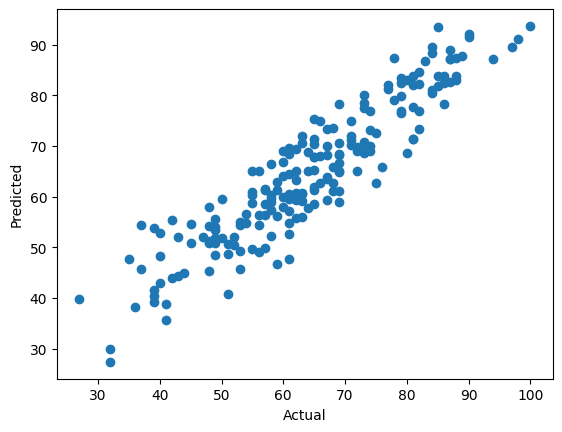

In [17]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

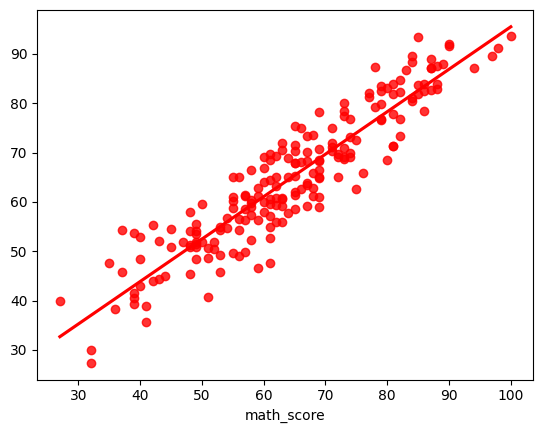

In [18]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

## Saving Model

In [20]:
import pickle
with open('linear_regression_model.p', 'wb') as file:
    pickle.dump(lin_model, file)